In [1]:
def fractal(x,df):
    global inpadoc_undo_nested
    global inpadoc_family_members_refractal_list
    global add_members
    add_members = ""
    inpadoc_family_members_refractal_list = []
    inpadoc_undo_nested = []  
    checklist = str(df["publication_number"])
    #add inpadox to list
    #if len(x)> 1:
     #   list(chain.from_iterable(x))
    #else:
     #   list(x)
    for k in x:
        ##print(len(k))
        if len(k) > 4:
            inpadoc_family_members_refractal_list.append(k)
            #print(inpadoc_family_members_refractal_list)
        else:
            #print("skiperino")
            continue
        if k in checklist:
            #print("1:"+k)
            family_members = list(chain.from_iterable(list(df.loc[df["publication_number"]==str(k),"inpadoc_family_members"])))
            #print("HALLO"+family_members)
            for members in family_members:
                if len(members) > 4:
                    
                    inpadoc_family_members_refractal_list.append(members)
                    
                    list(chain.from_iterable(inpadoc_family_members_refractal_list))
                else:
                    continue
            #print("2:"+str(inpadoc_family_members_refractal_list))

        else:
            continue
            #print("pass")
    #print(inpadoc_family_members_refractal_list)
    return inpadoc_family_members_refractal_list

def rerun_slower(x,df):
    global inpadoc_undo_nested
    global inpadoc_family_members_refractal_list
    inpadoc_family_members_refractal_list = []
    inpadoc_undo_nested = []  
    global run0
    run0 = fractal(x,df)
    run1 = fractal(run0,df)
    test1 = run0
    test2 = run1
    k= 0
    #print(run0)
    #print(run1)
    while set(test1) != set(test2):
        #print("hallo"+str(k))
        globals()[f"run1"] = fractal(run0,df)
        test1 = run1
        globals()[f"run0"] = fractal(run1,df)
        test2 = run0
        k=+1
        #print(k)
        #print("Startwert:"+str(globals()[f"run{k}"]))
        #print("Ergebnis:"+str(globals()[f"run{k}"]))
    return list(set(test2))

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt  
import matplotlib.animation 
#import matplotlib
#matplotlib.use('TkAgg')
import numpy as np

import requests 

import os
import pandas as pd
import psycopg2
#import contextily as ctx
#from shapely.geometry import Point
from mpl_toolkits.axes_grid1 import make_axes_locatable
from itertools import chain


In [3]:
#read files inside folder for translational data


from typing import List
import pathlib
wd = os.getcwd()
wd = wd+"/Prepared_Data"
def find_excel_files_in(directory:pathlib.Path) -> List[pathlib.Path]:
    
    files:List[pathlib.Path] = list()
    for filepath in directory.rglob('*.csv'):
        if filepath.is_file():
            files.append(filepath)

    return files

# List of your directories
directories:List[str] = [format(wd)]

found_files:List[pathlib.Path] = list()

for directory in directories:
    directory:pathlib.Path = pathlib.Path(directory)
    found_files.extend(find_excel_files_in(directory))

#read excel files
import pandas as pd

#print(files)
    #Deleting all empty rows in the file df
for files in found_files:
    data = pd.read_csv(files)



In [4]:
data.optimized_assignee

0                                    univ wuhan technology
1                                        tongji university
2                    china railway eryuan eng group co ltd
3                   zunyi rural development service center
4                 changjiang inst survey planning design &
                               ...                        
18702    guangdong res inst water resources & hyd | gua...
18703                             soletanche freyssinet sa
18704                                       doosan holding
18705                             soletanche freyssinet sa
18706                                 cj cheil jedang corp
Name: optimized_assignee, Length: 18707, dtype: object

Applying filters

In [5]:
#filter for assignee/applicants

assignee = "shell oil company"




In [6]:
#filter for assignee/applicants


#Prepare a compare column for assignee filter
assignee2 = assignee.lower()
assignee2 = assignee2.replace(" ","")
data["compare"] = data["optimized_assignee"]
data["compare"] =data["compare"].str.lower()
data["compare"] =data["compare"].str.replace(" ","")
#converting inpadoc_family_members back to list
data["inpadoc_family_members"] = data["inpadoc_family_members"].str.replace("'","")
data["inpadoc_family_members"] = data["inpadoc_family_members"].str.replace("[","")
data["inpadoc_family_members"] = data["inpadoc_family_members"].str.replace("]","")
data["inpadoc_family_members"] = data["inpadoc_family_members"].str.replace(" ","")
data["inpadoc_family_members"] = data["inpadoc_family_members"].fillna("")
data["inpadoc_family_members"] = data.apply(lambda x: x["inpadoc_family_members"] 
                                                        if len(x["inpadoc_family_members"]) > 4 
                                                        else "",axis=1 )
#check if publication number has been added to inpadoc_family_members and if not add it
data["inpadoc_family_members"] = data.apply(lambda x: str(x["publication_number"])+ " | " +str(x["inpadoc_family_members"]) 
                                            if str(x["publication_number"]) not in str(x["inpadoc_family_members"]) else str(x["inpadoc_family_members"])
                                            ,axis = 1)

#prepare inpadoc_family_members_column
data["inpadoc_family_members"] = data.apply(lambda x: str(x["inpadoc_family_members"]).split(","),axis = 1)

#data["inpadoc_family_members"] = data.apply(lambda x: x["inpadoc_family_members_list"].split(","),axis = 1)

#apply filter
data = data[data["compare"]==assignee2]
data.drop("compare",axis = 1,inplace = True)
#inpadoc_family_members_list = list(pre_data["inpadoc_family_members"])

#look for other members in the family
#inpadoc_family_members_list = rerun_slower(inpadoc_family_members_list,data)
#data[data["publication_number"].isin(inpadoc_family_members_list)]

#creation of comparable dataframe
data_compare = data

/var/folders/tc/nxb5r5_x357f2ns4dy4fd_b40000gn/T/ipykernel_3031/837641506.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["inpadoc_family_members"] = data["inpadoc_family_members"].str.replace("[","")
/var/folders/tc/nxb5r5_x357f2ns4dy4fd_b40000gn/T/ipykernel_3031/837641506.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["inpadoc_family_members"] = data["inpadoc_family_members"].str.replace("]","")


In [7]:
data

publication_number                                              title  \
294       WO2021216638A1  method for estimating fluid saturation of a ro...   
931       WO2022002810A1  method for estimating hydrocarbon saturation o...   
3149        CN205934968U  预制装配式地下筒仓结构 | prefabricated assembly type unde...   
3153        CN106088154A  预制装配式地下筒仓复合井筒施工方法及筒仓结构 | prefabricated assembl...   
10325     WO2021119235A1  procédé d'estimation de la saturation en hydro...   
11400     AU2002336664B2     thermally enhanced soil decontamination method   
11401         CA2463053C  biorestauration de sols contamines par du merc...   
11403        CA2463108A1  isolation de sol par barriere de congelation a...   
11404     WO2003051546A2  positionnement d'un puits pour assainissement ...   
11405     AU2002336664A1     thermally enhanced soil decontamination method   
11406     AU2002359299A1  isolation of soil with a frozen barrier prior ...   
11417    US20050116198A1  stabilisation of particulate material using wo...   
12518     AU2006340864B2  systems , methods , and processes for use in t...   
12519      IN200802610P4  systems, methods and processes for use in trea...   
12648      IN200805642P4  systems and processes for use in treating subs...   
12859         GB2457210B  methods of investigating an underground format...   
12933      IN200906206P4  "systems, methods, and processes for use in tr...   
13032    US20110046934A1  monitoring a region of interest in a subsurfac...   
13068      IN201002696P4  systems, methods, and processes utilized for t...   
13429     AU2012203086B2                       variable voltage transformer   

                                   assignee_or_applicant  \
294    shell oil company,us | shell internationale re...   
931    shell internationale research maatschappij b.v...   
3149                               黄竟强,成都市,四川省,611130,cn   
3153                               黄竟强,成都市,四川省,611130,cn   
10325  shell oil company,us | shell internationale re...   
11400  shell internationale research maatschappij b.v...   
11401                 shell canada limited,calgary,a1,ca   
11403                 shell canada limited,calgary,a1,ca   
11404     shell oil company,us | shell canada limited,ca   
11405  shell internationale research maatschappij b.v...   
11406  shell internationale research maatschappij b.v...   
11417                                                NaN   
12518  shell internationale research maatschappij b.v...   
12519  shell internationale research maatschappij b v,nl   
12648  shell internationale research maatschappij b v,nl   
12859                              shell int research,nl   
12933   shell internationale research maatschappij bv,nl   
13032                                                NaN   
13068    shell internationale research maatschappij b.v.   
13429    shell internationale research maatschappij b.v.   

      priority_date_earliest application_date publication_date  \
294               2020-04-22       2021-04-21       2021-10-28   
931               2020-06-30       2021-06-28       2022-01-06   
3149              2016-08-16       2016-08-16       2017-02-08   
3153              2016-08-16       2016-08-16       2016-11-09   
10325             2019-12-12       2020-12-10       2021-06-17   
11400             2001-10-24       2002-10-24       2007-09-13   
11401             2001-10-24       2002-10-24       2010-09-21   
11403             2001-10-24       2002-10-24       2003-05-01   
11404             2001-10-24       2002-10-24       2003-06-26   
11405             2001-10-24       2002-10-24       2003-07-03   
11406             2001-10-24       2002-10-24       2003-07-03   
11417             2001-11-08       2005-01-26       2005-06-02   
12518             2005-10-24       2006-10-20       2010-12-23   
12519             2005-10-24       2008-05-26       2009-03-06   
12648             2006-04-21       2008-10-20       2009-03-20   
12859             2007-01-19 

In [8]:
data_compare[data_compare["publication_number"]== "AU2012203086B8"]



Empty DataFrame
Columns: [publication_number, title, assignee_or_applicant, priority_date_earliest, application_date, publication_date, inpadoc_family_members, optimized_assignee, inventor, abstract, claims, claims_english, application_number, dead_or_alive_inpadoc_family_status, pdf_copy, country, type_of_document, st.30, simplified_status, patent_status_description, use, method, mixture, len_claims, len_inpadoc, test, len_test]
Index: []

[0 rows x 27 columns]

In [9]:
data_compare[data_compare["publication_number"]== "AU2012203086A1"]



Empty DataFrame
Columns: [publication_number, title, assignee_or_applicant, priority_date_earliest, application_date, publication_date, inpadoc_family_members, optimized_assignee, inventor, abstract, claims, claims_english, application_number, dead_or_alive_inpadoc_family_status, pdf_copy, country, type_of_document, st.30, simplified_status, patent_status_description, use, method, mixture, len_claims, len_inpadoc, test, len_test]
Index: []

[0 rows x 27 columns]

In [10]:
list(data.inpadoc_family_members)[5][0]

'AU2002336664B2'

In [11]:

#creation of df containg every family member as entry even tho some data might not exists 
publication_number = []
inpadoc_family = []
listdata = list(data.inpadoc_family_members)
for i in range(len(listdata)):
    for k in range(len(listdata[i])):
        #print(str(i)+"   "+str(k)+"list:"+listdata[i][k])
        publication_number.append(listdata[i][k])
        inpadoc_family.append(listdata[i])
d = {'publication_number': publication_number,
    'inpadoc_family_members': inpadoc_family}
data_family = pd.DataFrame(data=d)
#make column inpadoc_family_members mergable
data["inpadoc_family_members"] = data["inpadoc_family_members"].astype("string")
data_family["inpadoc_family_members"] = data_family["inpadoc_family_members"].astype("string")
#merge
data_family = data_family.merge(data_compare, right_on=['publication_number','inpadoc_family_members'],left_on=['publication_number','inpadoc_family_members'],how="left")

data_family.reset_index(inplace= True)
data_family = data_family.drop("index", axis = 1)
#drop duplicates
data_family = data_family.drop_duplicates(subset=["publication_number"], keep="first")
data = data_family

In [12]:
#DATA ADJUSTMENTS

#read files inside folder for translation of publication Number 

wd = os.getcwd()
from typing import List
import pathlib
wd2 = wd + "/Translationaldata"
def find_excel_files_in(directory:pathlib.Path) -> List[pathlib.Path]:
    
    files:List[pathlib.Path] = list()
    for filepath in directory.rglob('*.xlsx'):
        if filepath.is_file():
            files.append(filepath)

    return files

# List of your directories
directories:List[str] = [format(wd2)]

found_files:List[pathlib.Path] = list()

for directory in directories:
    directory:pathlib.Path = pathlib.Path(directory)
    found_files.extend(find_excel_files_in(directory))

#read excel files
import pandas as pd

#print(files)
    #Deleting all empty rows in the file df
for files in found_files:
    xls = pd.ExcelFile(files)

file = pd.read_excel(xls, "PUBLNR",skiprows=2)

filter = file["DOCDB"] != " "
file = file[filter]

#Filling all empty cells in the country code(CC) column inside file df

for x in range(len(file)):
    if file.iloc[x][0] != " ":
        shortcode_for_country = file.iloc[x][0]
    if file.iloc[x][0] == " ":
        file.iloc[x][0] = shortcode_for_country
    if file.iloc[x][1] != " ":
        countryname = file.iloc[x][1]
    if file.iloc[x][1] == " ":
        file.iloc[x][1] = countryname




#read ST.30 Sheet in excel file for creating "simplified_status",patent_status and patent_status_description
df1_additional = pd.read_excel(xls, 'ST30_Pub availability',skiprows = 2)
df1_additional = df1_additional[["Unnamed: 0", "Kindcode", "ST.30"]].astype("string").fillna(" ")
df1_additional.reset_index(inplace= True)
df1_additional = df1_additional.drop("index", axis = 1)
df1_additional["Kindcode"] = df1_additional["Kindcode"].str.replace(" ","")
# #Filling all empty cells in the country code(CC) column

for x in range(len(df1_additional)):
    if df1_additional.iloc[x][0] != " ":
        shortcode_for_country = df1_additional.iloc[x][0]
    if df1_additional.iloc[x][0] == " ":
        df1_additional.loc[df1_additional.index[x], 'Unnamed: 0'] = f"{shortcode_for_country}"

#Concatenating all different types of documents into one Column

file = file.groupby(['CC','Description','DOCDB'])['Type of document'].apply(', '.join).reset_index()

for col in ["Type of document"]:
    file[col]=file[col].str.split(", ").map(set).str.join(", ")
file["Type of document"] = file["Type of document"].str.replace(', ','| ')

#Translation summary of the type of document
df1_translation = pd.read_excel(xls, 'ST30_Pub availability',skiprows = 0)
df1_translation = df1_translation[["ST.30","Description XML element"]].astype("string").fillna(" ")
filter = df1_translation["ST.30"] != " "
df1_translation = df1_translation[filter]

#Comparing columns from both data frames(file and data) to fill the column 'Country' in the data df
data.drop("country",axis = 1,inplace = True)
data["Country"] = ""
for i in range(len(data.publication_number)):
    #print(f'1 {i}')
    for x in range(len(file.CC)):
        #print(f'2 {x}')
        if data["publication_number"].iloc[i][0:2] == file.CC.iloc[x]:
            #print(f'3 {data["publication_number"].iloc[i][0:2]}')
            #print(f'4 {file.CC.iloc[x]}')  
            data.loc[i,'Country'] = file.loc[x,"Description"]
            break


#Inserting a "Type of document" column
#Comparing the last two indexes to the DOCDB column to determine the type of document
#Comparing the last index to the DOCDB column to determine the type of document
data["type_of_document"] = ""

for i in range(len(data.publication_number)):
    #print(f'1 {i}')
    for x in range(len(file.DOCDB)):
        #print(f'2 {x}')
        if data["publication_number"].iloc[i][-2:]  == file.DOCDB.iloc[x] and data["Country"].iloc[i] == file.Description.iloc[x]:
            #print(f'3 {data["publication_number"].iloc[i][0:2]}')
            #print(f'4 {file.CC.iloc[x]}')  
            #data['type_of_document'].iloc[i] = file["Type of document"].iloc[x]
            
            data.loc[i,"type_of_document"] = file.loc[x,"Type of document"]
            break
        if data["publication_number"].iloc[i][-1:]  == file.DOCDB.iloc[x] and data["Country"].iloc[i] == file.Description.iloc[x]:
            #print(f'3 {data["publication_number"].iloc[i][0:2]}')
            #print(f'4 {file.CC.iloc[x]}')  
            data.loc[i,"type_of_document"] = file.loc[x,"Type of document"]

            break
        
#Making a new column comparing two df
#The Kindcode from df1_additional df and publication number from the data df
#Numbers compared and inserted(450,470, A44 etc), each number represents a type
#of document

data["ST.30"] = ""
for i in range(len(data.publication_number)):
    #print(f'1 {i}')
    for x in range(len(df1_additional)):
        #print(f'2 {x}')
        if data["publication_number"].iloc[i][-2:]  == df1_additional["Kindcode"].iloc[x]:
            if data["publication_number"].iloc[i][0:2] == df1_additional["Unnamed: 0"].iloc[x]:
            #print(f'3 {data["publication_number"].iloc[i][0:2]}')
            #print(f'4 {file.CC.iloc[x]}')  
                data.loc[i,'ST.30'] = df1_additional.loc[x,'ST.30']
                break
        if data["publication_number"].iloc[i][-1:]  == df1_additional["Kindcode"].iloc[x]:
            if data["publication_number"].iloc[i][0:2] == df1_additional["Unnamed: 0"].iloc[x]:
            #print(f'3 {data["publication_number"].iloc[i][0:2]}')
            #print(f'4 {file.CC.iloc[x]}')  
                data.loc[i,'ST.30'] = df1_additional.loc[x,'ST.30']
                break

#create simplified_status column; look at df1_translation for changes
data["simplified_status"]= data.apply(lambda x: "granted" if x["ST.30"]== "450" or x["ST.30"]=="470"
                                                         else "not granted",axis=1)
                            
data["patent_status_description"] = ""
for i in range(len(data.publication_number)):

    for x in range(len(df1_translation)):
  
        if data["ST.30"].iloc[i]  == df1_translation["ST.30"].iloc[x]:
            data.loc[i,"patent_status_description"] = df1_translation.loc[x,'Description XML element']
            break
#make data columns lowercase
data.columns = data.columns.str.lower()
#hong kong to china in order to be displayed in worldmap later
data["country"] = data.apply(lambda x: "china" if x["country"]== 'hong kong (s.a.r.)' else x["country"],axis =1)


Check if the filter is usable

In [13]:
if len(data) == 0:
    print("WARNING: no data available using this filter")
    print(len(data))
else:
    print("filter application works")
    print(len(data))

filter application works
1317


Creating 3 dataframes: All, Granted, Not-Granted 

In [14]:
#create data for total and add it to data df
#Creating 3 dataframes: All, Granted, Not-Granted with new column total_of_publication_number respectively
from pandas import NA

total_column = data[data['country'].values != ""]
total_column = total_column[["publication_number","country"]].groupby('country').agg('count')
total_column.rename(columns = {"publication_number" : "total_of_publication_number"}, inplace = True)
total_column.reset_index(inplace = True)
total_column["total_of_publication_number"] = total_column.apply(lambda x: NA if x["total_of_publication_number"] == 0 else x["total_of_publication_number"],axis = 1)
data_all_total = data.merge(total_column, left_on = 'country', right_on = 'country', how='left')
#data_all_total

#create data for proportion and add it to data df BUT FOR GRANTED ONLY
prestep= data[data['country'].values != ""]
total_column = prestep[prestep["simplified_status"] == "granted"]
if len(total_column) == 0:
    data_granted_total = None
    print("WARNING: no patents are granted with this filter")
else:
    total_column = total_column[["publication_number","country"]].groupby('country').agg('count')
    total_column.rename(columns = {"publication_number" : "total_of_publication_number"}, inplace = True)
    total_column.reset_index(inplace = True)
    total_column["total_of_publication_number"] = total_column.apply(lambda x: NA if x["total_of_publication_number"] == 0 else x["total_of_publication_number"],axis = 1)
    data_granted_total = data.merge(total_column, left_on = 'country', right_on = 'country', how='left')
    #data_granted_total

#create data for proportion and add it to data df BUT FOR NOT-GRANTED ONLY
prestep= data[data['country'].values != ""]
total_column = prestep[prestep["simplified_status"] == "not granted"]
if len(total_column) == 0:
    data_not_granted_total = None
    print("WARNING: no patents are not-granted with this filter")
    
else:
    total_column = total_column[["publication_number","country"]].groupby('country').agg('count')
    total_column.rename(columns = {"publication_number" : "total_of_publication_number"}, inplace = True)
    total_column.reset_index(inplace = True)
    total_column["total_of_publication_number"] = total_column.apply(lambda x: NA if x["total_of_publication_number"] == 0 else x["total_of_publication_number"],axis = 1)
    data_not_granted_total = data.merge(total_column, left_on = 'country', right_on = 'country', how='left')
    #data_not_granted_total

In [15]:
total_column

country  \
0                                         Australia   
1                                           Austria   
2                                            Brazil   
3                                            Canada   
4                                             China   
5                      Eurasian Patent Organization   
6                            European Patent Office   
7                                           Germany   
8                                             India   
9                                            Israel   
10                                            Japan   
11                                    Korea (South)   
12                                      New Zealand   
13                                           Norway   
14                               Russian Federation   
15                                           Sweden   
16                                           Taiwan   
17                                   United Kingdom   
18                         United States of America   
19  World Intellectual Property Organization (WIPO)   

    total_of_publication_number  
0                            64  
1                             9  
2                            11  
3                            81  
4                            87  
5                            24  
6                            70  
7                             9  
8                             4  
9                            80  
10                           36  
11                           17  
12                           26  
13                            1  
14                           28  
15                            1  
16                            1  
17                           30  
18                          158  
19                          120

In [16]:
#get current working directory

current_wd = os.getcwd()
path_worldmap= "/Worldmap/World_Countries.shp"
path_worldmap = current_wd+path_worldmap
path_worldmap

'/Users/ademzemni/neuefische/capstone/Capstone_Project/Worldmap/World_Countries.shp'

In [17]:
#read worldmap shape file
world_map = gpd.read_file(path_worldmap)

In [18]:
#make country names lowercase in order to match dataframes by countrynames
world_map["COUNTRY"]=world_map["COUNTRY"].str.lower()
world_map.sort_values(by = "COUNTRY")

COUNTRY  \
2                     afghanistan   
5                         albania   
3                         algeria   
9             american samoa (us)   
237  american virgin islands (us)   
..                            ...   
240                western sahara   
242                 western samoa   
244                         yemen   
245                        zambia   
246                      zimbabwe   

                                              geometry  
2    POLYGON ((61.27656 35.60725, 61.29638 35.62853...  
5    POLYGON ((20.79192 40.43154, 20.78722 40.39472...  
3    POLYGON ((-5.15213 30.18047, -5.13917 30.19236...  
9    POLYGON ((-170.74390 -14.37556, -170.74942 -14...  
237  POLYGON ((-64.89612 17.67667, -64.89140 17.683...  
..                                                 ...  
240  POLYGON ((-14.30347 21.34167, -14.46722 21.340...  
242  MULTIPOLYGON (((-172.59650 -13.50911, -172.551...  
244  MULTIPOLYGON (((48.68639 14.03750, 48.61000 14...  
245  POLYGON ((30.21302 -14.98172, 30.21917 -15.096...  
246  POLYGON ((32.48888 -21.34445, 32.46541 -21.325...  

[252 rows x 2 columns]

In [19]:
#adjust important names for merging
world_map["COUNTRY"] = world_map["COUNTRY"].str.replace("united states", "united states of america")
world_map["COUNTRY"] = world_map["COUNTRY"].str.replace("south korea", "korea (south)")
world_map["COUNTRY"] = world_map["COUNTRY"].str.replace("moldova", "republic of moldova")
world_map["COUNTRY"] = world_map["COUNTRY"].str.replace("russia", "russian federation")
#data["country"] = data["country"].str.replace("hong kong (s.a.r.)", "china")
#world_map["COUNTRY"] = world_map["COUNTRY"].str.replace(f"hong kong (s.a.r)", "china")

In [20]:
if data_granted_total is not None:
    print("lol")

lol


In [21]:
#merge dataframes
if data_all_total is not None:  
    merged_all = world_map.merge(data_all_total, left_on = 'COUNTRY', right_on = 'country', how='outer')
    merged_all['total_of_publication_number'] = merged_all['total_of_publication_number'].fillna(0)
else:
    print("WARNING: no patents exists using this filter")
#merge granted
if data_granted_total is not None:
    merged_granted = world_map.merge(data_granted_total, left_on = 'COUNTRY', right_on = 'country', how='outer')
    merged_granted['total_of_publication_number'] = merged_granted['total_of_publication_number'].fillna(0)
else:
    print("WARNING: no patents are granted using this filter")
if data_not_granted_total is not None:
    merged_not_granted = world_map.merge(data_not_granted_total, left_on = 'COUNTRY', right_on = 'country', how='outer')
    merged_not_granted['total_of_publication_number'] = merged_not_granted['total_of_publication_number'].fillna(0)
else:
    print("WARNING: no patents are not granted using this filter")

In [22]:
#create list of countries that are not on the world map

countries_not_on_map = []
for element in list(total_column["country"]):
    if element not in list(world_map["COUNTRY"]):
        countries_not_on_map.append(element)
 
print(countries_not_on_map)

['Australia', 'Austria', 'Brazil', 'Canada', 'China', 'Eurasian Patent Organization', 'European Patent Office', 'Germany', 'India', 'Israel', 'Japan', 'Korea (South)', 'New Zealand', 'Norway', 'Russian Federation', 'Sweden', 'Taiwan', 'United Kingdom', 'United States of America', 'World Intellectual Property Organization (WIPO)']


In [23]:
#extract proportions for if "country" is no actual country
nocountries = total_column["country"].isin(countries_not_on_map)
nocountries = total_column[nocountries]
nocountries

country  \
0                                         Australia   
1                                           Austria   
2                                            Brazil   
3                                            Canada   
4                                             China   
5                      Eurasian Patent Organization   
6                            European Patent Office   
7                                           Germany   
8                                             India   
9                                            Israel   
10                                            Japan   
11                                    Korea (South)   
12                                      New Zealand   
13                                           Norway   
14                               Russian Federation   
15                                           Sweden   
16                                           Taiwan   
17                                   United Kingdom   
18                         United States of America   
19  World Intellectual Property Organization (WIPO)   

    total_of_publication_number  
0                            64  
1                             9  
2                            11  
3                            81  
4                            87  
5                            24  
6                            70  
7                             9  
8                             4  
9                            80  
10                           36  
11                           17  
12                           26  
13                            1  
14                           28  
15                            1  
16                            1  
17                           30  
18                          158  
19                          120

In [24]:
merged_all[merged_all["COUNTRY"]=="china"]

COUNTRY                                           geometry  \
41   china  MULTIPOLYGON (((110.71583 20.06889, 110.77859 ...   

   publication_number inpadoc_family_members title assignee_or_applicant  \
41                NaN                   <NA>   NaN                   NaN   

   priority_date_earliest application_date publication_date  \
41                    NaN              NaN              NaN   

   optimized_assignee  ... use method mixture len_claims len_inpadoc test  \
41                NaN  ... NaN    NaN     NaN        NaN         NaN  NaN   

    len_test country st.30 total_of_publication_number  
41       NaN     NaN   NaN                         0.0  

[1 rows x 31 columns]

In [25]:
import math
def round_up_to_nearest_10(num):
    return math.ceil(num / 10) * 10

round_up_to_nearest_10(21)

30

In [26]:
#plot worldmap ALL
def plot_worldmap(df,situational,status):
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib import cm
    from matplotlib.colors import TwoSlopeNorm
    import statistics

    #statistics.median(percentage_column["proportion_of_publication_number"])


    fig, ax = plt.subplots(figsize = (20,10))

    #divider = make_axes_locatable(ax)

    #cax = divider.append_axes("right", size="5%", pad=0.1)

    # create a normalized colorbar
    #norm = TwoSlopeNorm(vmin=min(total_column["total_of_publication_number"]),
    #                vcenter=statistics.median(total_column["total_of_publication_number"]),
    #                vmax=max(total_column["total_of_publication_number"]))
    cmap=plt.cm.get_cmap('plasma', 50)
    #cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

    #creating values for tick in legend; 20 ticks
    ticks = []
    for x in range(1,21):
        ticks.append(x/10*round_up_to_nearest_10(max(df["total_of_publication_number"])))

    tick_label = []
    for x in range(1,21):
       tick_label.append(x/10*round_up_to_nearest_10(max(df["total_of_publication_number"])))

    #not in use yet
    legend_label = []
    for x in range(1,21):
        legend_label.append(f"{round(x/20*max(df['total_of_publication_number']),0)}%")
        #legend_label

    fig = df.plot(ax = ax,markersize = 100,column = 'total_of_publication_number', figsize=(20,10),
                                                     cmap=cmap,
                                                     # create a normalized colorbar
                                                     #cbar = plt.cm.ScalarMappable(norm=norm),  
                                                     legend = True,
                                                    
                                                     legend_kwds={'label': 'Number of Patents',
                                                                    #'title_fontsize':20,
                                                                    'orientation': "horizontal",
                                                                    'pad': 0.04,
                                                                    'fraction': 0.09,
                                                                   # 'norm': norm,
                                                                    'ticks':ticks
                                                                    #"fmt":"{:%}"
                                                                    
                                                                    },
                                                     missing_kwds={
                                                                 "color":"grey",
                                                                 "edgecolor":"black",
                                                                 "hatch":"---",
                                                                 "label":"Missing Values"
                                                                },
                                                     vmin=0, vmax=round_up_to_nearest_10(max(df["total_of_publication_number"]))
                                                     )


    #include no countries in the title
    #creation of string
    #preparation for no country entries
    nocountries_string =f"{str(nocountries.iloc[0][0])}: {str(round(nocountries.iloc[0][1],2))}% \n "
    #nocountries_string
    for i in range(len(nocountries)):
        if i == 0:
            continue
        nocountries_string = nocountries_string + f"{str(nocountries.iloc[i][0])}: {str(round(nocountries.iloc[i][1],2))}% \n "

    #ax_cbar = fig.colorbar(cbar, ax=ax)
    #plt.legend(title = "lol",loc = "lower center")
    
    from datetime import datetime
    now = datetime.now()
    plt.title(f"{now.strftime('%d/%m/%Y %H:%M')}", loc='right', fontsize=15, color='grey', style='italic')
    plt.tick_params(left = False, bottom = False)

    #preparing the making of a condition for how many of the patents are actually in the data
    data_av_pubnum = list(df["publication_number"].dropna())
    data_notav_pubnum = list(data["publication_number"])
    count = int(0)
    for x in data_av_pubnum:
        if x in data_notav_pubnum:
            count +=1
    #ax.axes.set_xticklabels(tick_label)
    if situational is not None:

        plt.title(f"Worldwide distribution of {status} patents\n{assignee} | family members:{len(situational[situational['publication_number'].notnull()])}", fontsize = 30, loc = "left",y = 1.01,style = 'italic')
        
    else:
        #check
        if count == len(data_av_pubnum):
            plt.title(f"Worldwide distribution of {status} patents\n{assignee} | total claims:{df['len_claims'].sum()}", fontsize = 30, loc = "left",y = 1.01,style = 'italic')
        else:
            plt.title(f"Worldwide distribution of {status} patents\n{assignee}", fontsize = 30, loc = "left",y = 1.01,style = 'italic')
    #make condition for how many of the patents are actually in the data
    
        
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.show()

In [27]:
merged_all.columns

Index(['COUNTRY', 'geometry', 'publication_number', 'inpadoc_family_members',
       'title', 'assignee_or_applicant', 'priority_date_earliest',
       'application_date', 'publication_date', 'optimized_assignee',
       'inventor', 'abstract', 'claims', 'claims_english',
       'application_number', 'dead_or_alive_inpadoc_family_status', 'pdf_copy',
       'type_of_document', 'st.30', 'simplified_status',
       'patent_status_description', 'use', 'method', 'mixture', 'len_claims',
       'len_inpadoc', 'test', 'len_test', 'country', 'st.30',
       'total_of_publication_number'],
      dtype='object')

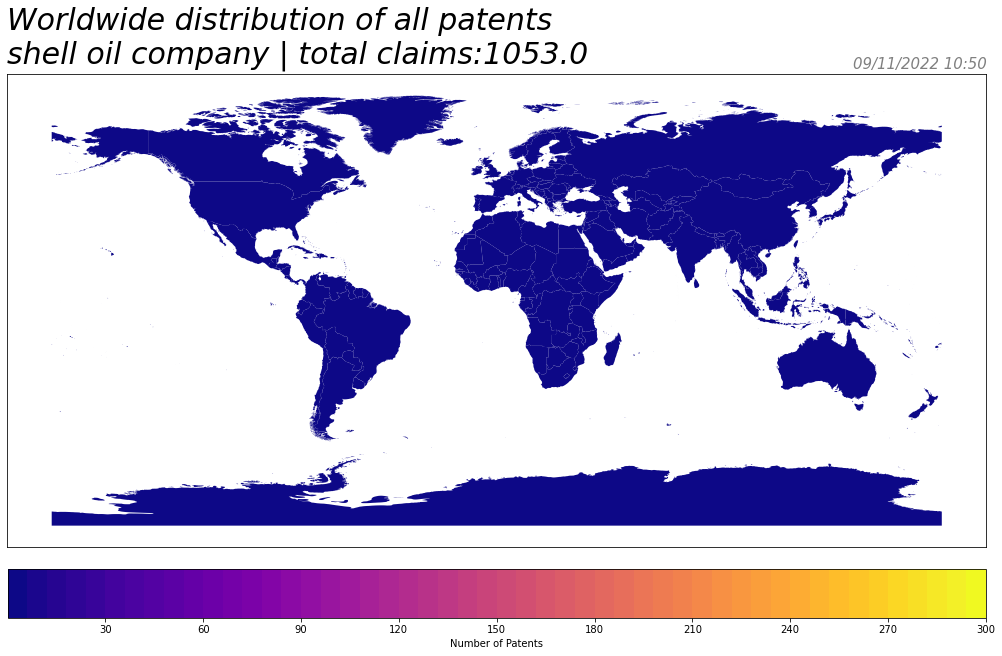

In [28]:
if merged_all is not None:
    plot_worldmap(merged_all,None,"all")
else:
    print("WARNING: no patents exists using this filter")

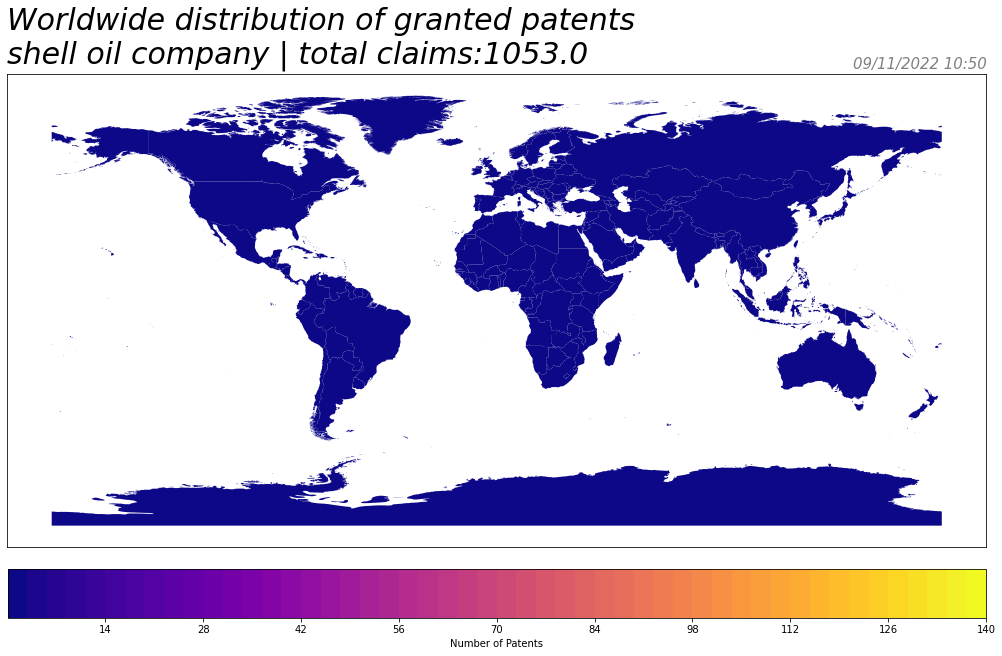

In [29]:
if merged_granted is not None:
    plot_worldmap(merged_granted,None,"granted")
else:
     print("WARNING: no patents are granted using this filter")

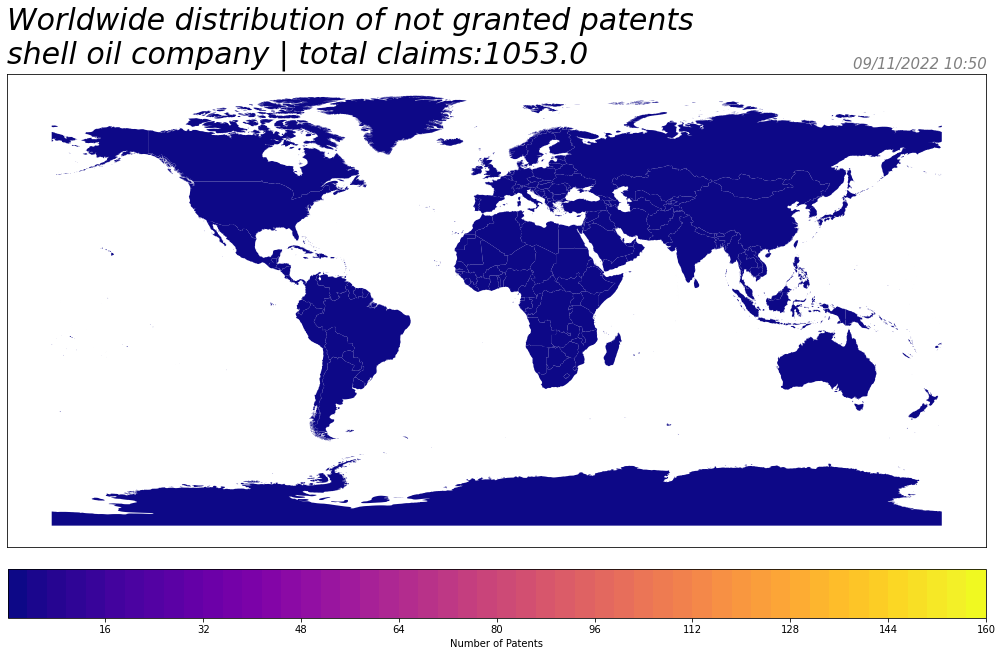

In [30]:
if merged_not_granted is not None:
    plot_worldmap(merged_not_granted,None,"not granted")
else:
     print("WARNING: no patents are not-granted using this filter")

In [31]:
def plot_worldmap_for_each_family(df,status):
    if "total_of_publication_number" in df.columns:
        df.drop("total_of_publication_number",axis = 1, inplace = True)
    families = data_all_total["inpadoc_family_members"].unique()
    for i in families:
        if i is NA:
            continue
        else:
            
            situational_data = df[df["inpadoc_family_members"]== i]
            #create column with aggregated count of patents country-wise
            total_column = situational_data[situational_data['country'].values != ""]
            total_column = total_column[["publication_number","country"]].groupby('country').agg('count')
            total_column.rename(columns = {"publication_number" : "total_of_publication_number"}, inplace = True)
            total_column.reset_index(inplace = True)
            total_column["total_of_publication_number"] = total_column.apply(lambda x: NA if x["total_of_publication_number"] == 0 else x["total_of_publication_number"],axis = 1)
            situational_data = situational_data.merge(total_column, left_on = 'country', right_on = 'country', how='left')
            #data_all_total
            situational_data= world_map.merge(situational_data, left_on = 'COUNTRY', right_on = 'country', how='outer')
            situational_data['total_of_publication_number'] =situational_data['total_of_publication_number'].fillna(0)

            #create variables for text showoff
            text = [f"countries and their total count:\n"]
            unique_countries = situational_data.country.dropna().unique()
            for k in unique_countries:
                countries = k
                values = str(int(situational_data[situational_data["country"]==str(k)][["total_of_publication_number"]].agg('count')))
                text.append(f"{countries}: {values} \n")
            print(f"length of the family: {len(situational_data[situational_data['publication_number'].notnull()])} \nthe family: {i}\n{''.join(text)}\n{plot_worldmap(situational_data,situational_data,status)}")
        
    

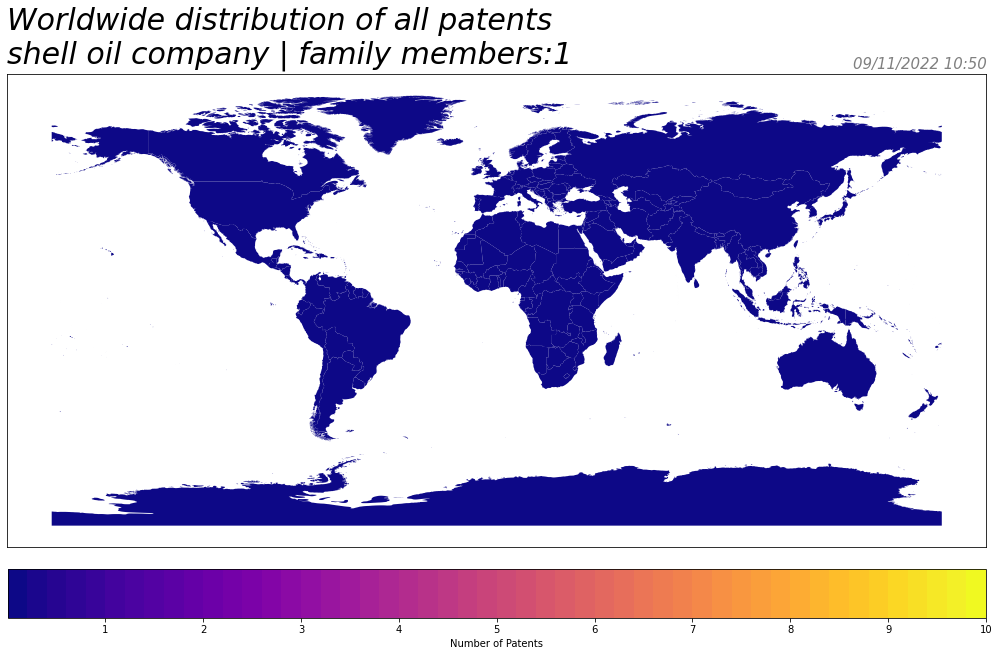

length of the family: 1 
the family: ['WO2021216638A1']
countries and their total count:
World Intellectual Property Organization (WIPO): 1 

None


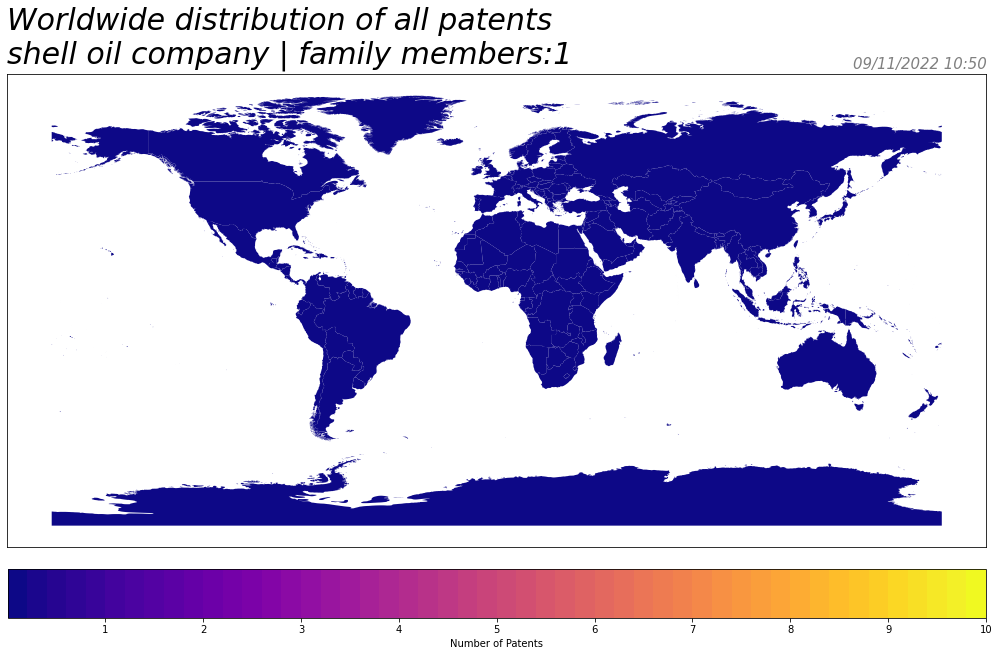

length of the family: 1 
the family: ['WO2022002810A1']
countries and their total count:
World Intellectual Property Organization (WIPO): 1 

None


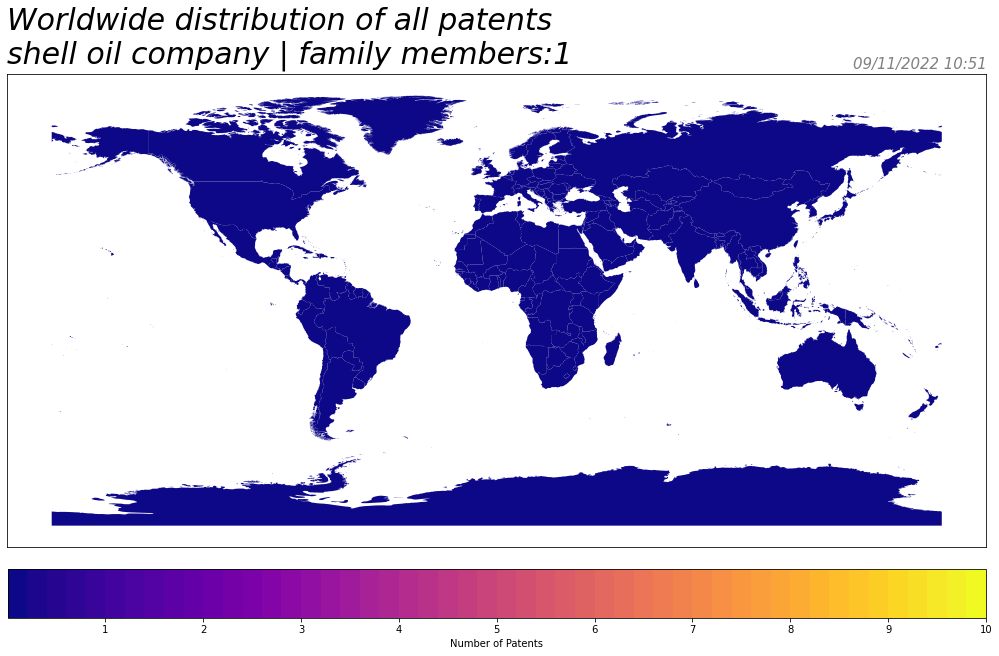

length of the family: 1 
the family: ['CN205934968U']
countries and their total count:
China: 1 

None


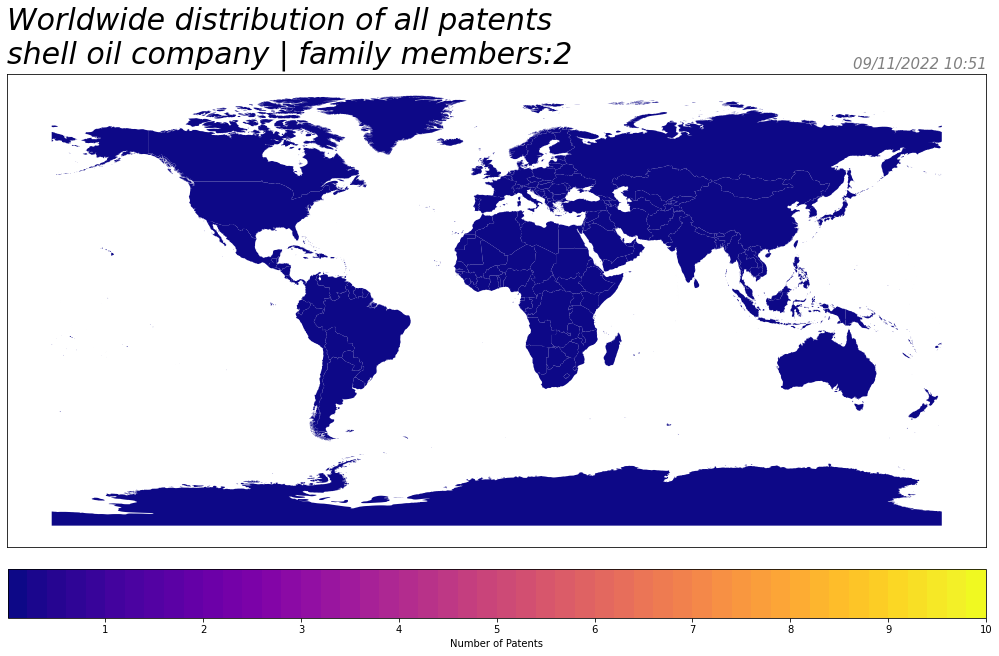

length of the family: 2 
the family: ['CN106088154A', 'CN106088154B']
countries and their total count:
China: 2 

None


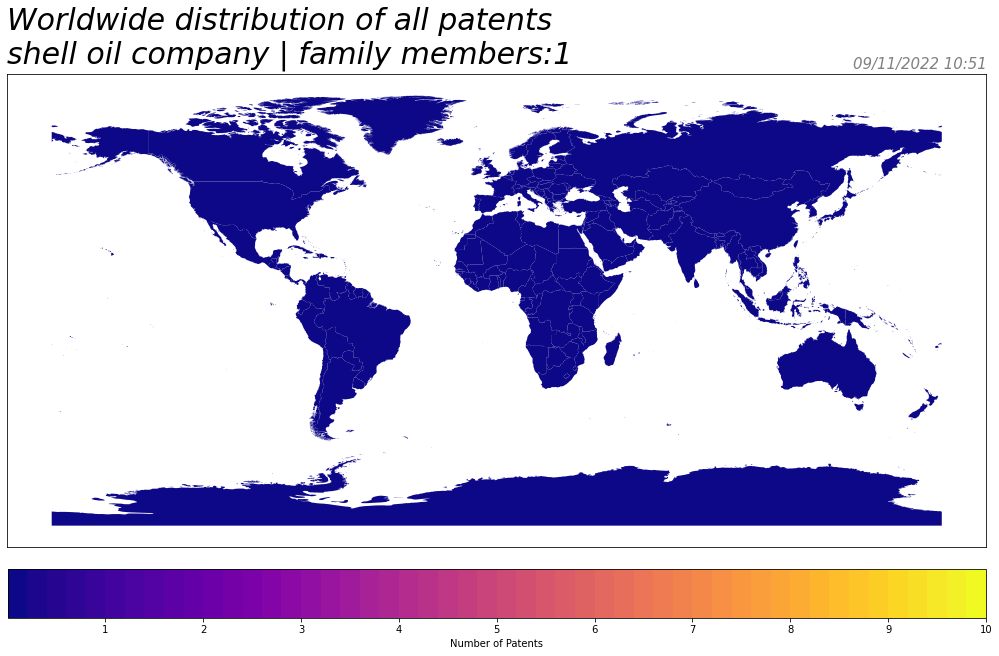

length of the family: 1 
the family: ['WO2021119235A1']
countries and their total count:
World Intellectual Property Organization (WIPO): 1 

None


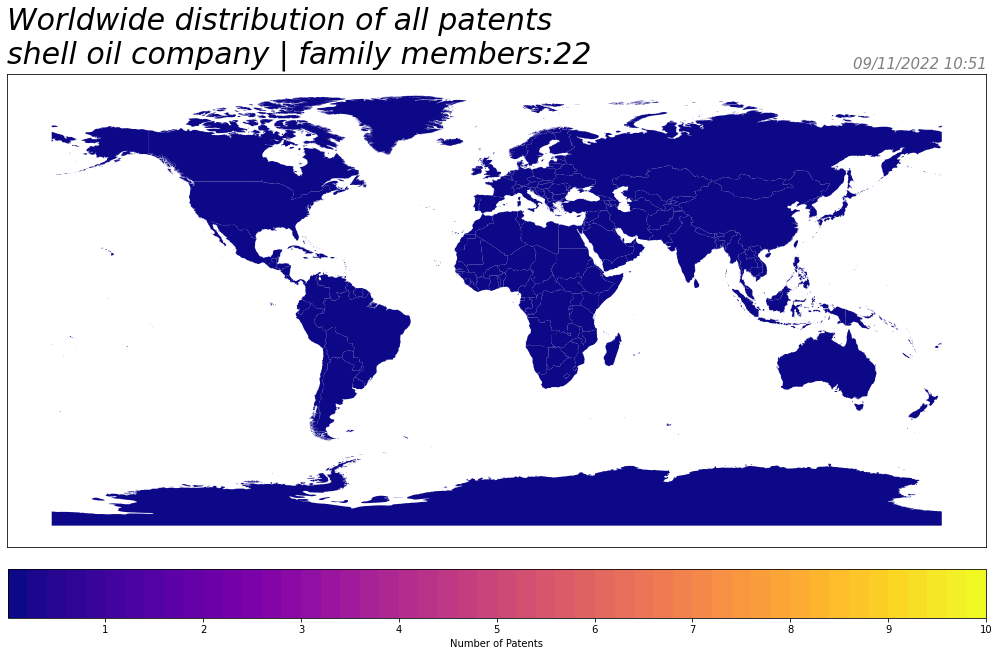

length of the family: 22 
the family: ['AU2002336664B2', 'AT299403T', 'AU2002336664C1', 'BR200213511A', 'BRPI0213511B1', 'CA2462215A1', 'CA2462215C', 'DE60205038D1', 'DE60205038T2', 'DK1467826T3', 'EP1467826A1', 'EP1467826B1', 'EP1467826B8', 'JP04509558B2', 'JP2005506902A', 'KR2004048428A', 'KR925129B1', 'MX2004003712A', 'TW564192B', 'US20040126190A1', 'US6951436B2', 'WO2003035290A1']
countries and their total count:
Australia: 2 
Austria: 1 
Brazil: 2 
Canada: 2 
Germany: 2 
Denmark: 1 
European Patent Office: 3 
Japan: 2 
Korea (South): 2 
Mexico: 1 
Taiwan: 1 
United States of America: 2 
World Intellectual Property Organization (WIPO): 1 

None


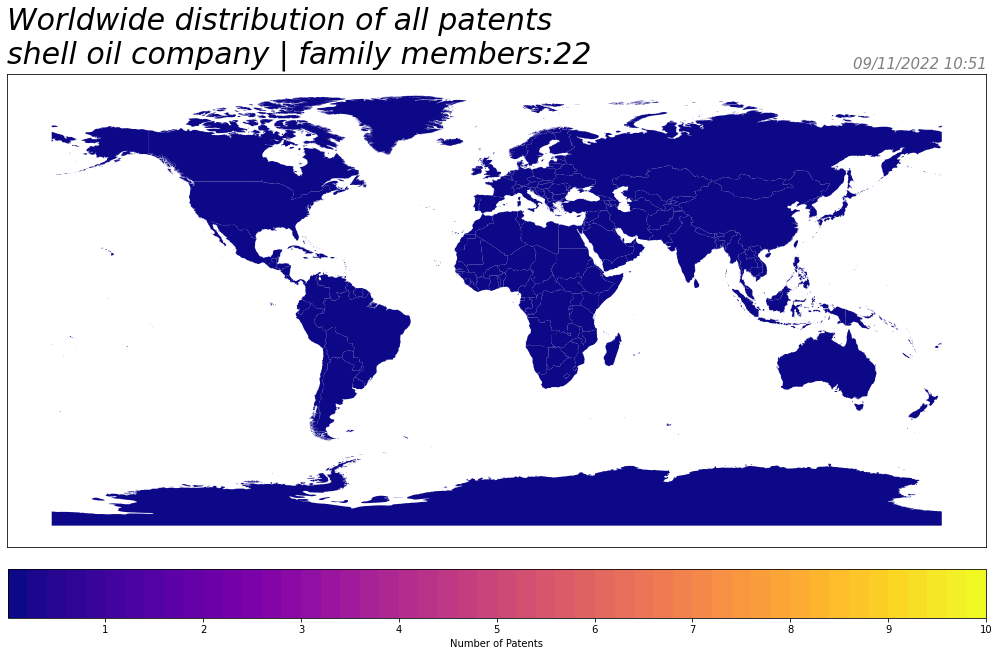

length of the family: 22 
the family: ['CA2463053C', 'AT342138T', 'AU2002365145A1', 'AU2002365145B2', 'AU2002365145C1', 'BR200213512A', 'BRPI0213512B1', 'CA2463053A1', 'DE60215378D1', 'DE60215378T2', 'DK1446239T3', 'EP1446239A2', 'EP1446239B1', 'JP04344803B2', 'JP2005512791A', 'KR2004048991A', 'KR925130B1', 'MX2004003716A', 'US20040120771A1', 'US6962466B2', 'WO2003053603A2', 'WO2003053603A3']
countries and their total count:
Canada: 2 
Austria: 1 
Australia: 3 
Brazil: 2 
Germany: 2 
Denmark: 1 
European Patent Office: 2 
Japan: 2 
Korea (South): 2 
Mexico: 1 
United States of America: 2 
World Intellectual Property Organization (WIPO): 2 

None


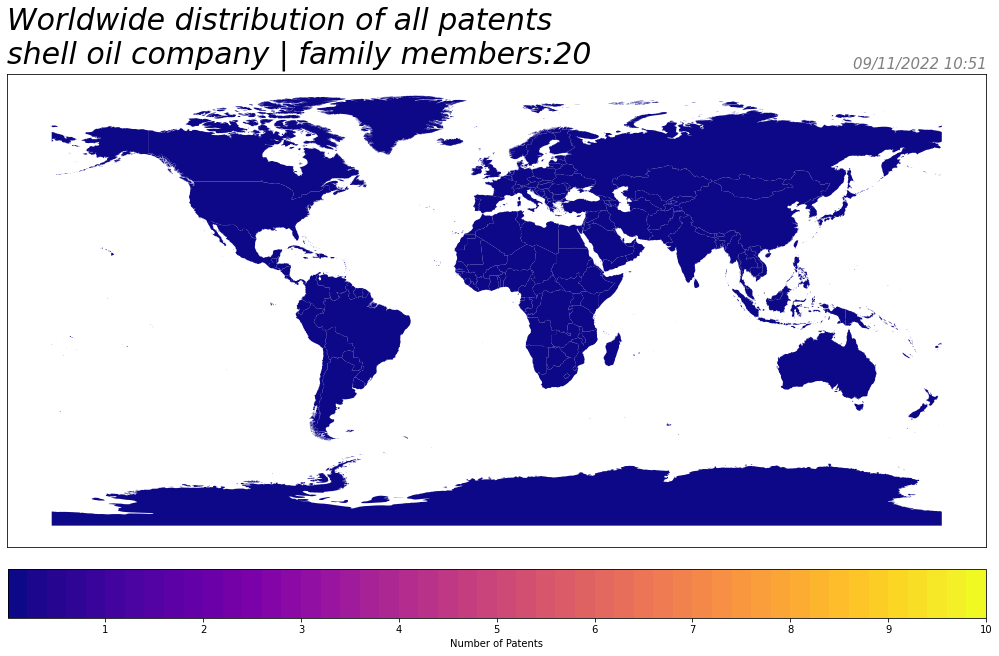

length of the family: 20 
the family: ['CA2463108A1', 'AT402294T', 'AU2002359299B2', 'BR200213513A', 'BRPI0213513B1', 'BRPI0213513B8', 'CA2463108C', 'DE60227826D1', 'DK1438462T3', 'EP1438462A2', 'EP1438462B1', 'JP04344795B2', 'JP2005516751A', 'KR2004048973A', 'KR900892B1', 'MX2004003711A', 'US20040120772A1', 'US6854929B2', 'WO2003035987A2', 'WO2003035987A3']
countries and their total count:
Canada: 2 
Austria: 1 
Australia: 1 
Brazil: 3 
Germany: 1 
Denmark: 1 
European Patent Office: 2 
Japan: 2 
Korea (South): 2 
Mexico: 1 
United States of America: 2 
World Intellectual Property Organization (WIPO): 2 

None


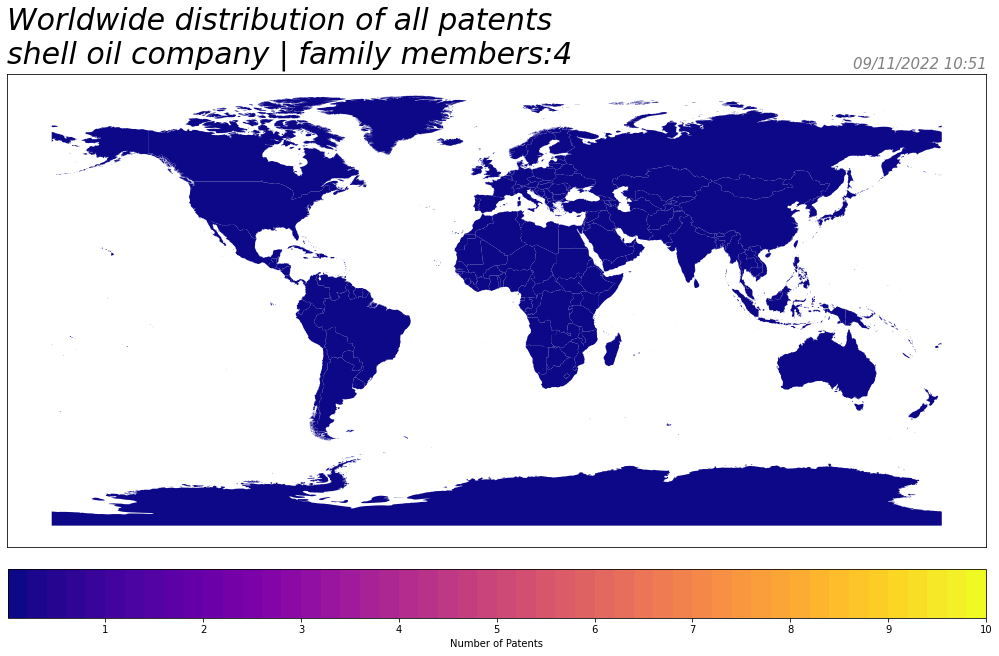

length of the family: 4 
the family: ['WO2003051546A2', 'AU2002364942A1', 'US20030110794A1', 'WO2003051546A3']
countries and their total count:
World Intellectual Property Organization (WIPO): 2 
Australia: 1 
United States of America: 1 

None


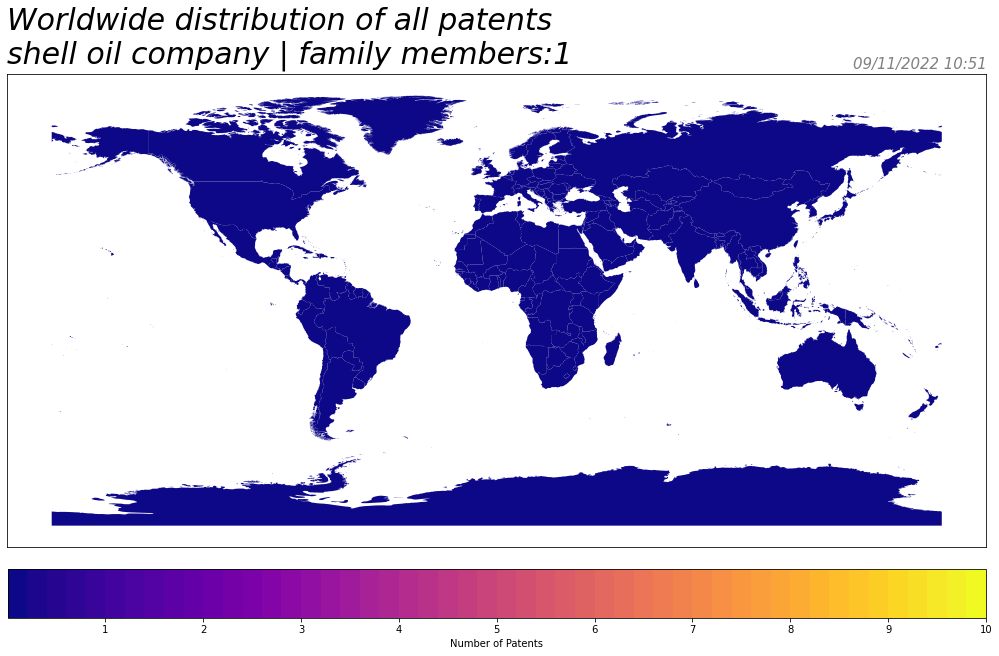

length of the family: 1 
the family: ['AU2002336664A1']
countries and their total count:
Australia: 1 

None


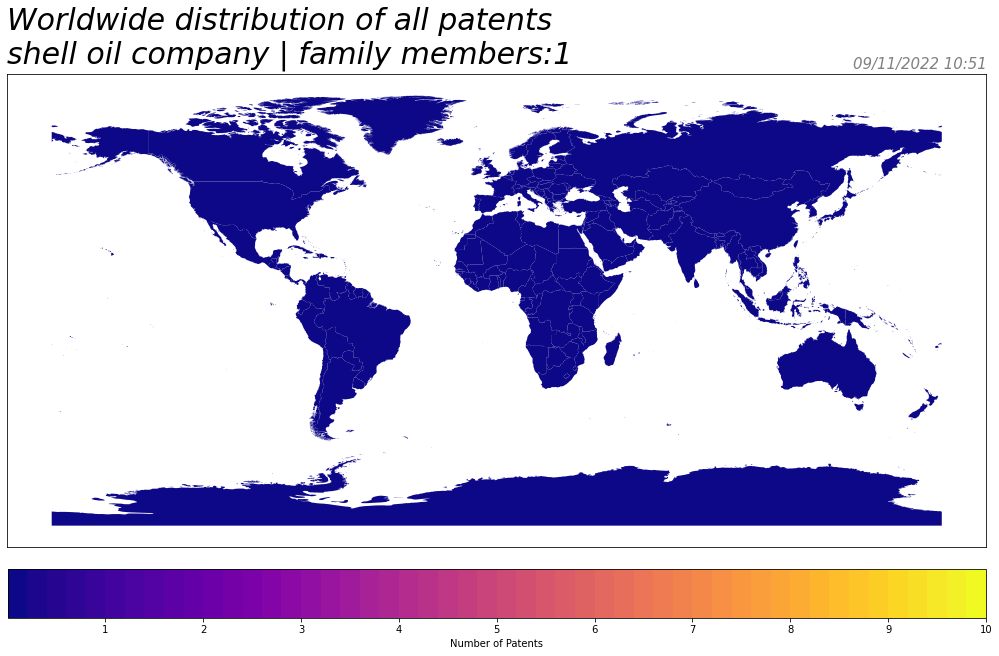

length of the family: 1 
the family: ['AU2002359299A1']
countries and their total count:
Australia: 1 

None


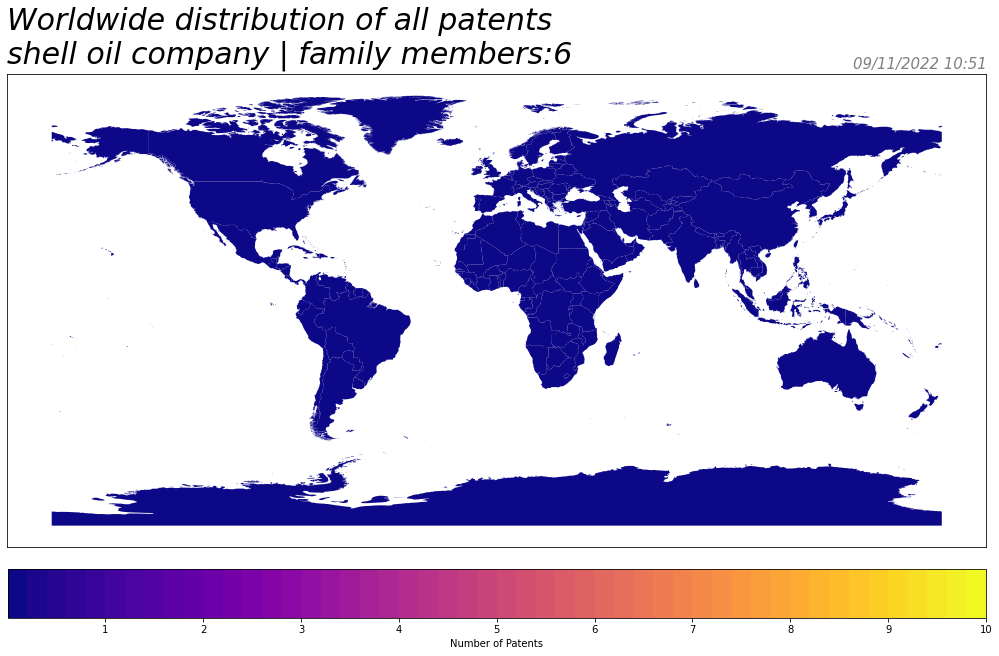

length of the family: 6 
the family: ['US20050116198A1', 'CA2472346A1', 'EP1456323A1', 'MX2004004427A', 'NZ533407A', 'WO2003040258A1']
countries and their total count:
United States of America: 1 
Canada: 1 
European Patent Office: 1 
Mexico: 1 
New Zealand: 1 
World Intellectual Property Organization (WIPO): 1 

None


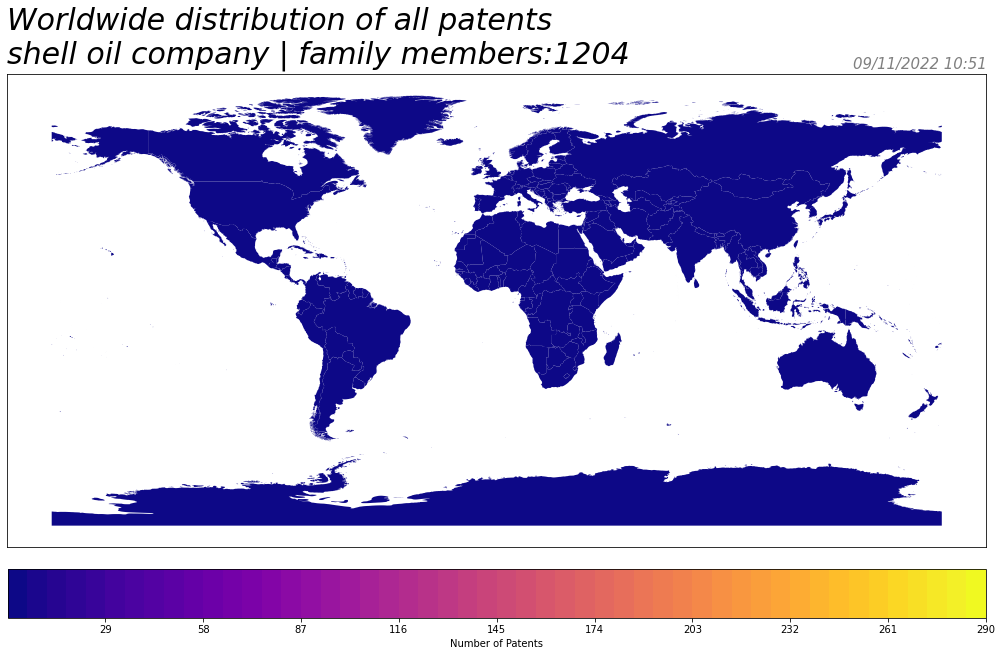

length of the family: 1204 
the family: ['AU2006340864B2', 'AT427410T', 'AT434713T', 'AT435964T', 'AT437290T', 'AT463658T', 'AT499428T', 'AU2006239886A1', 'AU2006239886B2', 'AU2006239958A1', 'AU2006239958B2', 'AU2006239961A1', 'AU2006239961B2', 'AU2006239962A1', 'AU2006239962B2', 'AU2006239962B8', 'AU2006239963A1', 'AU2006239963B2', 'AU2006239988A1', 'AU2006239988B2', 'AU2006239996A1', 'AU2006239996B2', 'AU2006239997A1', 'AU2006239997B2', 'AU2006239999A1', 'AU2006239999B2', 'AU2006240033A1', 'AU2006240033B2', 'AU2006240043A1', 'AU2006240043B2', 'AU2006240173A1', 'AU2006240173B2', 'AU2006240175A1', 'AU2006240175B2', 'AU2006306404A1', 'AU2006306404B2', 'AU2006306411A1', 'AU2006306411B2', 'AU2006306412A1', 'AU2006306412B2', 'AU2006306414A1', 'AU2006306414B2', 'AU2006306471A1', 'AU2006306471B2', 'AU2006306472A1', 'AU2006306472B2', 'AU2006306475A1', 'AU2006306475B2', 'AU2006306476A1', 'AU2006306476B2', 'AU2006340864A1', 'AU2006340864B9', 'AU2007240346A1', 'AU2007240346B2', 'AU2007240353A1',

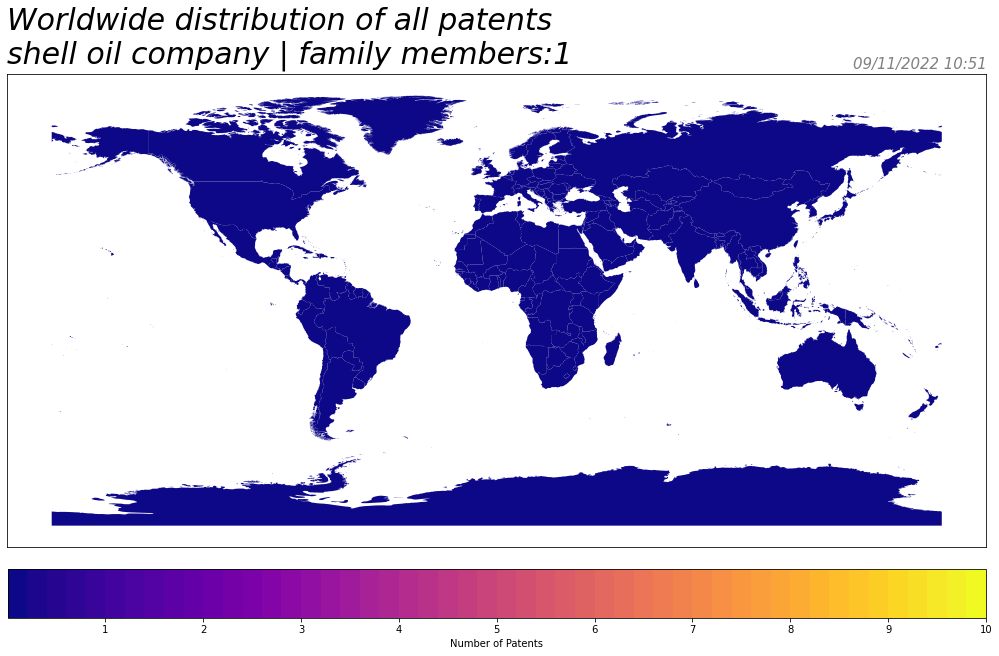

length of the family: 1 
the family: ['IN200802610P4']
countries and their total count:
India: 1 

None


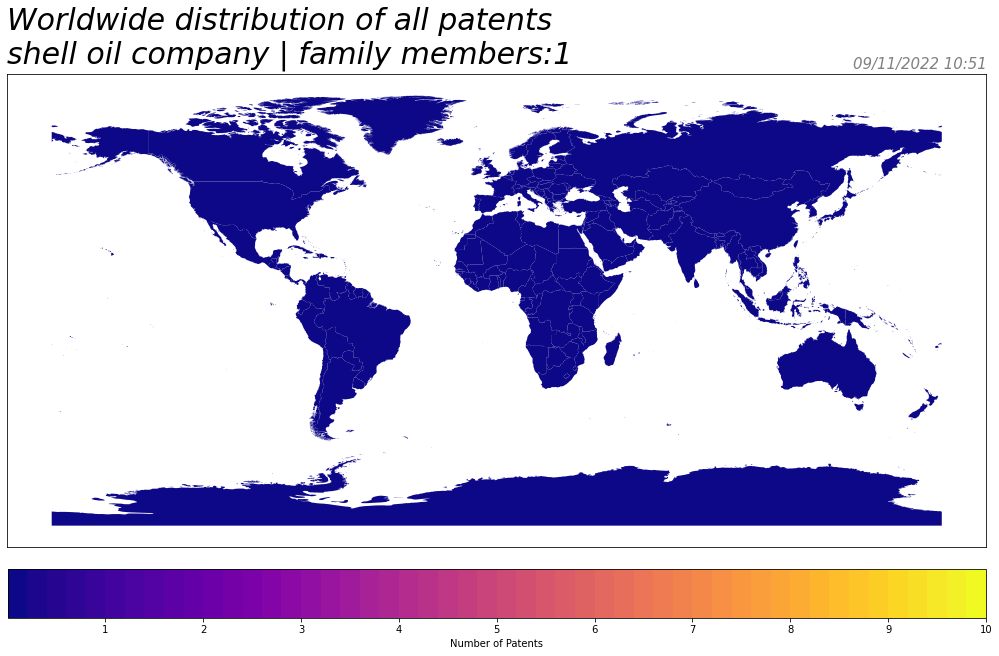

length of the family: 1 
the family: ['IN200805642P4']
countries and their total count:
India: 1 

None


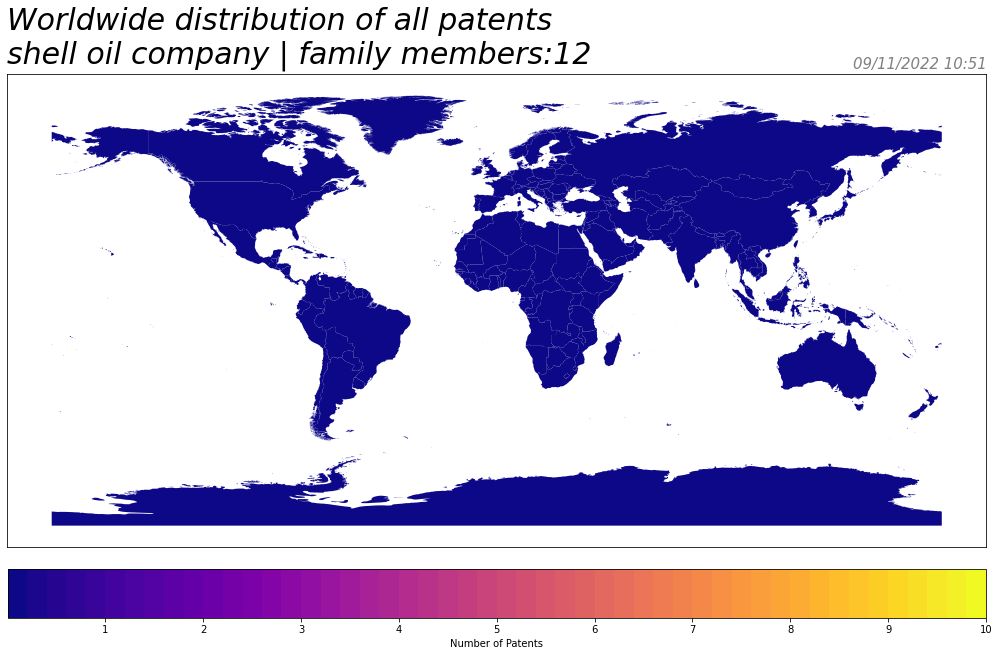

length of the family: 12 
the family: ['GB2457210B', 'AU2008206913A1', 'AU2008206913B2', 'CA2673412A1', 'GB200910578D0', 'GB2457210A', 'MY153029A', 'NO200902867L', 'NO341093B1', 'US20110139462A1', 'WO2008087174A2', 'WO2008087174A3']
countries and their total count:
United Kingdom: 3 
Australia: 2 
Canada: 1 
Malaysia: 1 
Norway: 2 
United States of America: 1 
World Intellectual Property Organization (WIPO): 2 

None


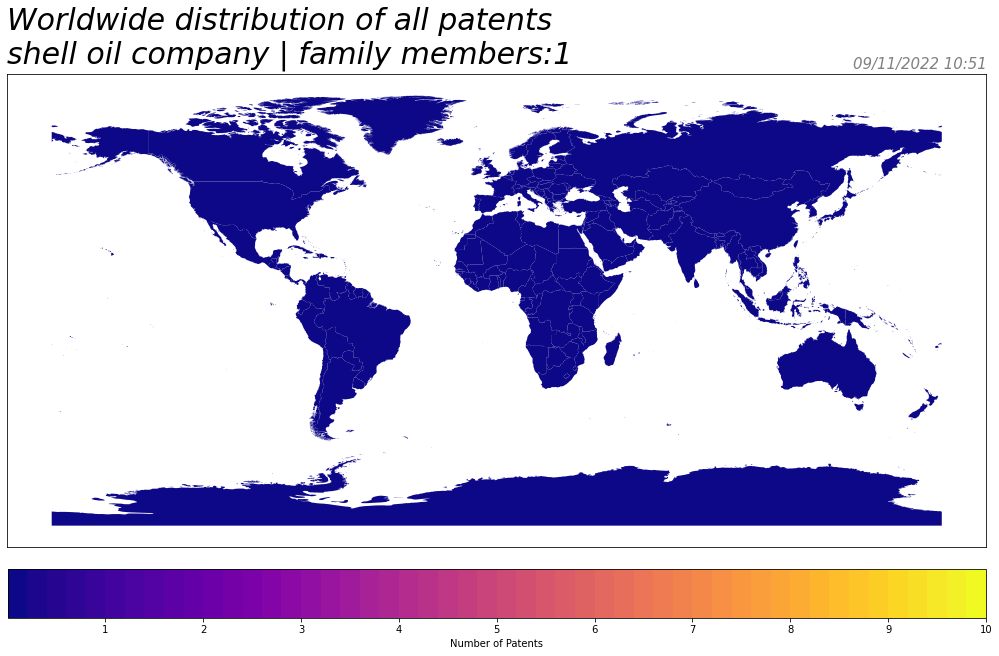

length of the family: 1 
the family: ['IN200906206P4']
countries and their total count:
India: 1 

None


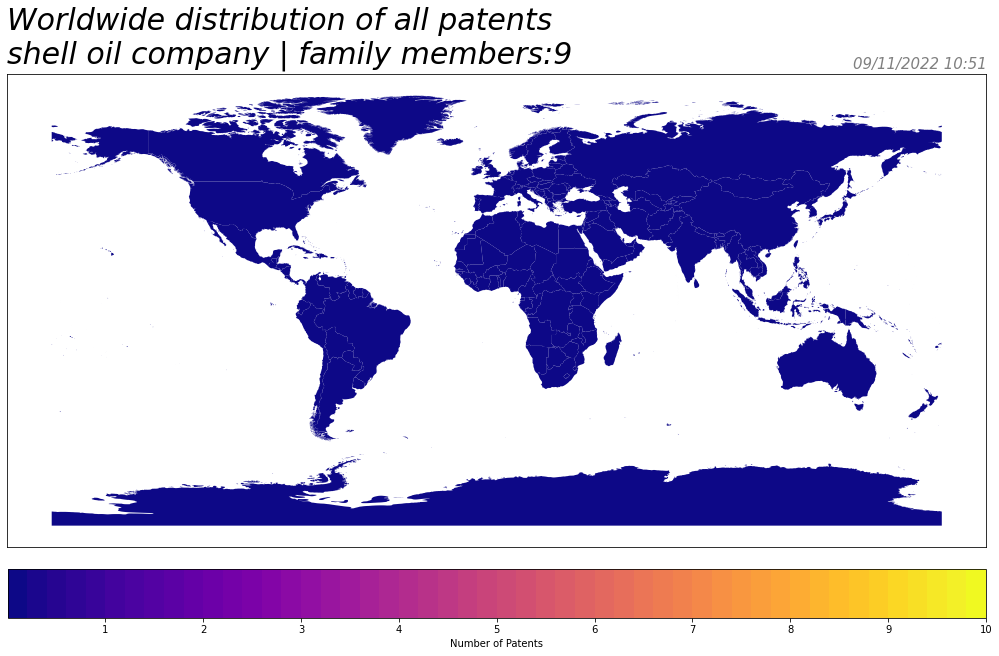

length of the family: 9 
the family: ['US20110046934A1', 'AU2008292169A1', 'AU2008292169B2', 'CA2695137A1', 'GB201001835D0', 'GB2464643A', 'GB2464643B', 'WO2009027420A2', 'WO2009027420A3']
countries and their total count:
United States of America: 1 
Australia: 2 
Canada: 1 
United Kingdom: 3 
World Intellectual Property Organization (WIPO): 2 

None


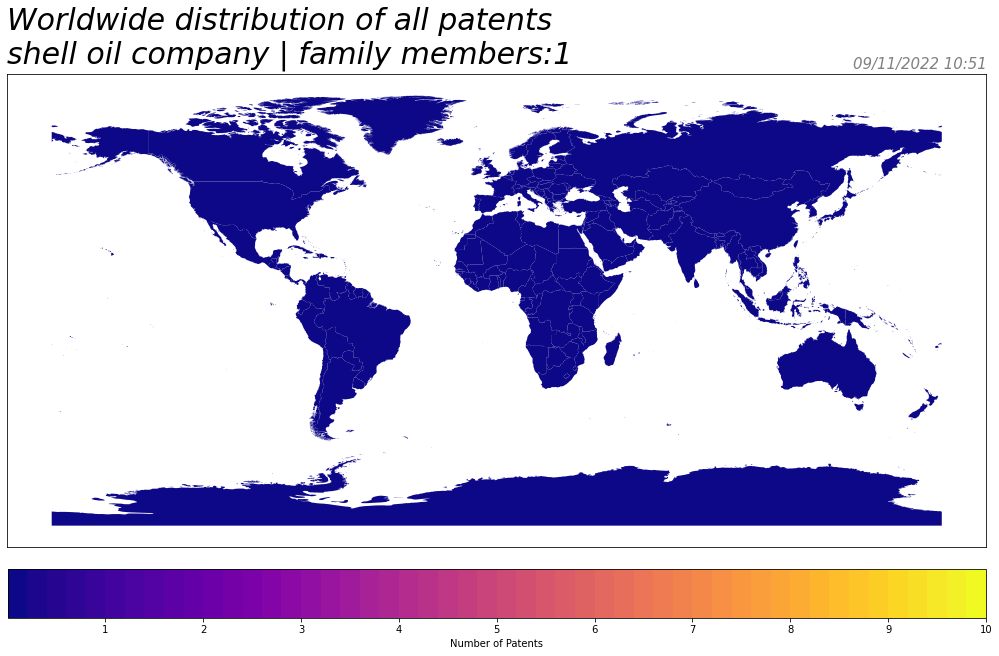

length of the family: 1 
the family: ['IN201002696P4']
countries and their total count:
India: 1 

None


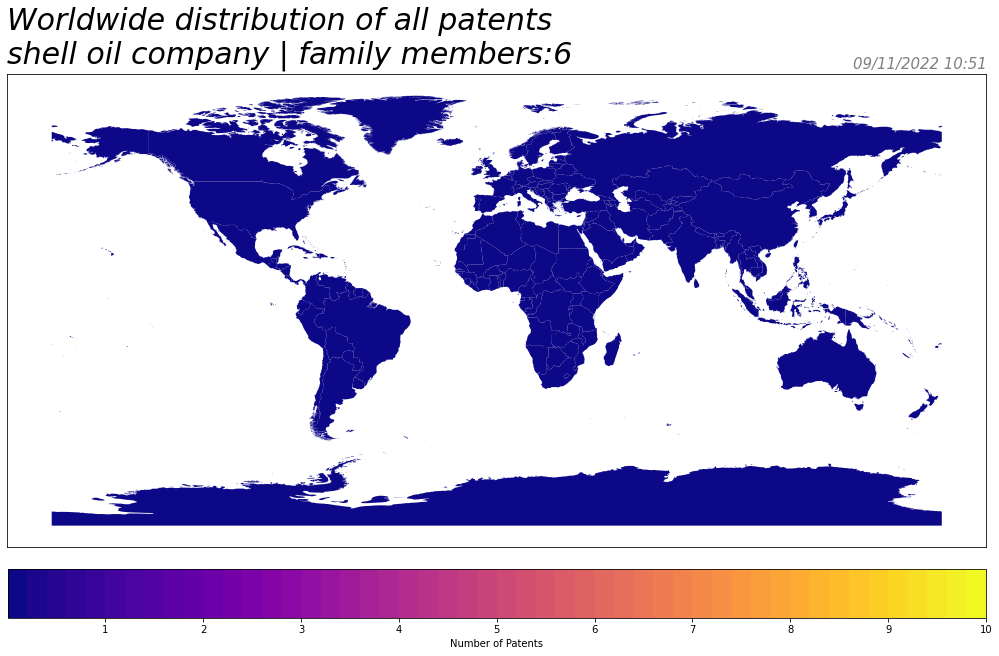

length of the family: 6 
the family: ['AU2012203086B2', 'AU2012203086A1', 'AU2012203086A8', 'AU2012203086B8', 'AU2012203096A1', 'AU2012203096B2']
countries and their total count:
Australia: 6 

None


In [32]:
#plot for all patents (granted and not granted)
plot_worldmap_for_each_family(data_all_total,"all")
